### Dimensionality Reduction UMAP

Jay Urbain, PhD

#### Objectives:    

-Students can explain additional popular nonlinear manifold learning techniques: **t-sne**, UMAP

-**Students can compare these techniques to each other and previously discussed techniques and understand the differences between them**

-**Students can evaluate the quality of the output of the previously discussed techniques**

-**Students can apply these techniques to a dataset**

-**Students can visualize the output of these techniques**

#### References

1. Leland McInnes, John Healy, James Melville, UMAP: Uniform Manifold Approximation and Projection for Dimension Reduction, 2018   
https://arxiv.org/pdf/1802.03426.pdf

2. James Melville, Some Theory (cost functions for t-SNE, UMAP, and more)    
https://jlmelville.github.io/smallvis/theory.html

3. Leland McInnes, umap   
https://github.com/lmcinnes/umap

4. Nikolay Oskolkov, How Exactly UMAP Works  
https://towardsdatascience.com/how-exactly-umap-works-13e3040e1668



### UMAP

Uniform Manifold Approximation and Projection (`UMAP`) is a manifold learning technique for dimensionality reduction.

`UMAP` can be used for visualization like `t-SNE`, but unlike `t-SNE`, it can also be used for general nonlinear dimension reduction for feature engineering. 

`UMAP` is constructed from a theoretical framework based in Riemannian geometry and algebraic topology.

The result is a practical and scalable algorithm that applies well to real world data.

The algorithm is founded on three assumptions about the data:

1. The data is uniformly distributed on a *[Riemannian manifold](https://en.wikipedia.org/wiki/Riemannian_manifold).    
2. The Riemannian metric is locally constant (or can be approximated as such).  
3. The manifold is locally connected.  

From these assumptions it is possible to model the manifold with a fuzzy topological structure. An embedding is found by searching for a low dimensional projection of the data that has the closest possible equivalent fuzzy topological structure.

\*`Riemannian manifolds` are smooth (continuous) manifolds (surfaces) with an inner product (Riemannian metric) on the tangent space at each point that varies smoothly from point to point. 

This gives local notions of angle, length of curves, surface area, volume, and **distance**. From these local geometric notions, other global quantities such as preservation of larger distances can be derived by integrating local contributions.


### Sumary of UMAP Benefits 

UMAP has a few significant wins in its current incarnation.

1. UMAP is fast. It can handle large datasets and high dimensional data without too much difficulty, scaling beyond what most t-SNE packages can manage.

2. UMAP scales well in embedding dimension. It isn't just for visualisation! You can use UMAP as a general purpose dimension reduction technique as a preliminary step to other machine learning tasks. With a little care it partners well with the hdbscan clustering library (for more details please see Using UMAP for Clustering).

3. UMAP often performs better at preserving aspects of global structure of the data than t-SNE. This means that it can often provide a better "big picture" view of your data as well as preserving local neighbor relations.

4. UMAP supports a wide variety of distance functions, including non-metric distance functions such as cosine distance and correlation distance. You can finally embed word vectors properly using cosine distance!

5. UMAP supports adding new points to an existing embedding via the standard sklearn transform method. This means that UMAP can be used as a preprocessing transformer in sklearn pipelines.

6. UMAP supports supervised and semi-supervised dimension reduction. This means that if you have label information that you wish to use as extra information for dimension reduction (even if it is just partial labelling) you can do that—as simply as providing it as the y parameter in the fit method.

7. UMAP has solid theoretical foundations in manifold learning (see our paper on ArXiv). This both justifies the approach and allows for further extensions that will soon be added to the library (embedding dataframes etc.).

### UMAP Usage

$ pip install umap
$ pip install datashader

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import umap
%matplotlib inline
sns.set(style='white', rc={'figure.figsize':(12,8)})

### How to use UMAP

The umap package inherits from sklearn classes, and thus drops in neatly next to other sklearn transformers with an identical calling API.

There are a number of parameters that can be set for the UMAP class; the
major ones are as follows:

 -  ``n_neighbors``: This determines the number of neighboring points used in
    local approximations of manifold structure. Larger values will result in
    more global structure being preserved at the loss of detailed local
    structure. In general this parameter should often be in the range 5 to
    50, with a choice of 10 to 15 being a sensible default.

 -  ``min_dist``: This controls how tightly the embedding is allowed to compress
    points together. Larger values ensure embedded points are more evenly
    distributed, while smaller values allow the algorithm to optimise more
    accurately with regard to local structure. Sensible values are in the
    range 0.001 to 0.5, with 0.1 being a reasonable default.

 -  ``metric``: This determines the choice of metric used to measure distance
    in the input space. A wide variety of metrics are already coded, and a user
    defined function can be passed as long as it has been JITd by numba.

    
An example of making use of these options:

### Applying UMAP


In [0]:
import warnings
warnings.simplefilter('ignore')

In [0]:
import umap
from sklearn.datasets import load_digits

digits = load_digits()

embedding = umap.UMAP().fit_transform(digits.data)

### Assignment PCA vs. t-SNE vs. UMAP on the Digits Data Set

1) Apply PCA, t-SNE, and UMAP to the Digits Data Set.

2) Plot the output of each with two components.

3) For t-SNE, identify the optimal perplexity.

4) For UMAP identify the optimal n_neighbors and min_dist.

5) Use plenty of iterations for t-SNE and UMAP, e.g., > 1000.

4) Plot your best PCA, t-SNE and UMAP projections adjacent together.

5) Record your observations.


### Digits dataset: PCA, t-SNE, UMAP

Load digits.

In [0]:
import umap
from sklearn.datasets import load_digits

digits = load_digits()
X = digits.data
y = digits.target

#### Apply PCA to fit and transform the digits data

In [0]:
from sklearn.decomposition import PCA
pca_digits = PCA(n_components=2)
pca_digits_X = pca_digits.fit_transform(X)

Plot the first two components of the PCA dimensionality reduction.

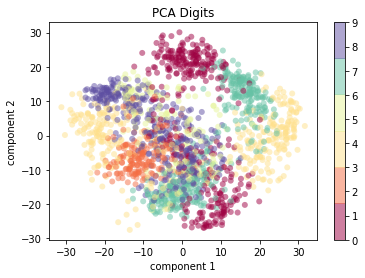

In [0]:
import matplotlib.pyplot as plt

plt.scatter(pca_digits_X[:, 0], pca_digits_X[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 6))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.title('PCA Digits')
plt.colorbar();


#### Apply t-SNE to fit and transform the digits data

In [0]:
pip install MulticoreTSNE

  Created wheel for MulticoreTSNE: filename=MulticoreTSNE-0.1-cp36-cp36m-linux_x86_64.whl size=68507 sha256=23bf91396cdfad409ea98ea44120e7cbdedc199ebdb86613410cb3a23a9a2fb7
  Stored in directory: /root/.cache/pip/wheels/27/59/53/3b52ee63add3692254c30d687fa4dff4d128d0557861fb028e
Successfully built MulticoreTSNE


In [0]:
from sklearn.manifold import TSNE
from MulticoreTSNE import MulticoreTSNE as TSNE

In [0]:
tsne_digits = TSNE(n_components=2, verbose=1,perplexity= 25, n_iter=1000)
tsne_digits_X = tsne_digits.fit_transform(X)

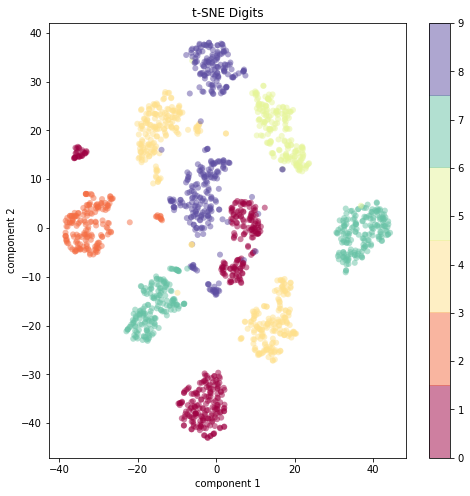

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
plt.scatter(tsne_digits_X[:, 0], tsne_digits_X[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 6))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.title('t-SNE Digits')
plt.colorbar();


#### Apply UMAP to fit and transform the digits data

In [0]:
import warnings
warnings.filterwarnings("ignore")

umap_digits = umap.UMAP(n_neighbors=7, min_dist=.1, metric='euclidean')
umap_digits_X = umap_digits.fit_transform(X)

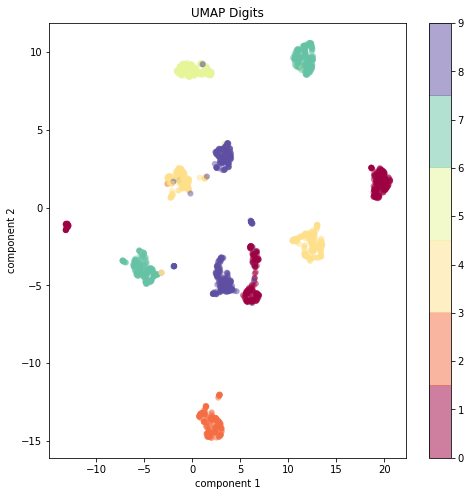

In [0]:
plt.figure(figsize=(8, 8))
plt.scatter(umap_digits_X[:, 0], umap_digits_X[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 6))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.title('UMAP Digits')
plt.colorbar();


Think about how this data set would look if it were unlabeled. Which of your methods does the best job of differentiating your classes?

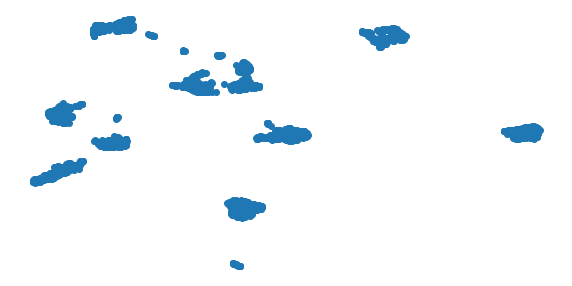

In [0]:
plt.figure(figsize=(10,5))
plt.scatter(umap_digits_X[:, 0], umap_digits_X[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

